In [1]:
#February 7, 2020
#Loads the matplotlib library to create a graphical representation of data to create inline plots
%matplotlib inline 

In [2]:
#gets the location to the home folder and the set path 
import os
home_folder = os.path.expanduser("~")
print(home_folder)

C:\Users\JRuiz


In [3]:
# Prints the location of the dataset by tracing a path from home 
data_folder = os.path.join(home_folder, "OneDrive", "Desktop", "Data Mining", "Chapter2HW", "Data")
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_filename)

C:\Users\JRuiz\OneDrive\Desktop\Data Mining\Chapter2HW\Data\ionosphere.data


In [4]:
import numpy as np
import csv

#X and y NumPy arrays to store dataset, size already known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

#Uses Comma-Separated Values to load file as csv reader object, then loops through the file, sets row in X and class in y for each line in data
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [5]:
#Splits the data into training and testing sets using scikit learn library 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [6]:
#uses nearest neighbor class and creates an instance of it, it will have default parameters for now and apply nearest neighbors algorithm (5 Neighbors) 
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [7]:
#uses fit training function, for nearest neighbors class, records the dataset and finds nearest neighbor for new point, by comparing it with training dataset 
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
#train the algorithm with the test set and evaluates testing set 
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [9]:
#uses Stratified K-Fold to create folds with same proportion of classes
from sklearn.model_selection import cross_val_score

In [10]:
#evaluates model using cross fold validation 
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The average accuracy is 82.3%


In [11]:
#Test out various values from 1-20 and examine the imapact of n_neighbors parameter, stores values in avg_scores and all_scores
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

In [12]:
plt.plot?

Object `plt.plot` not found.


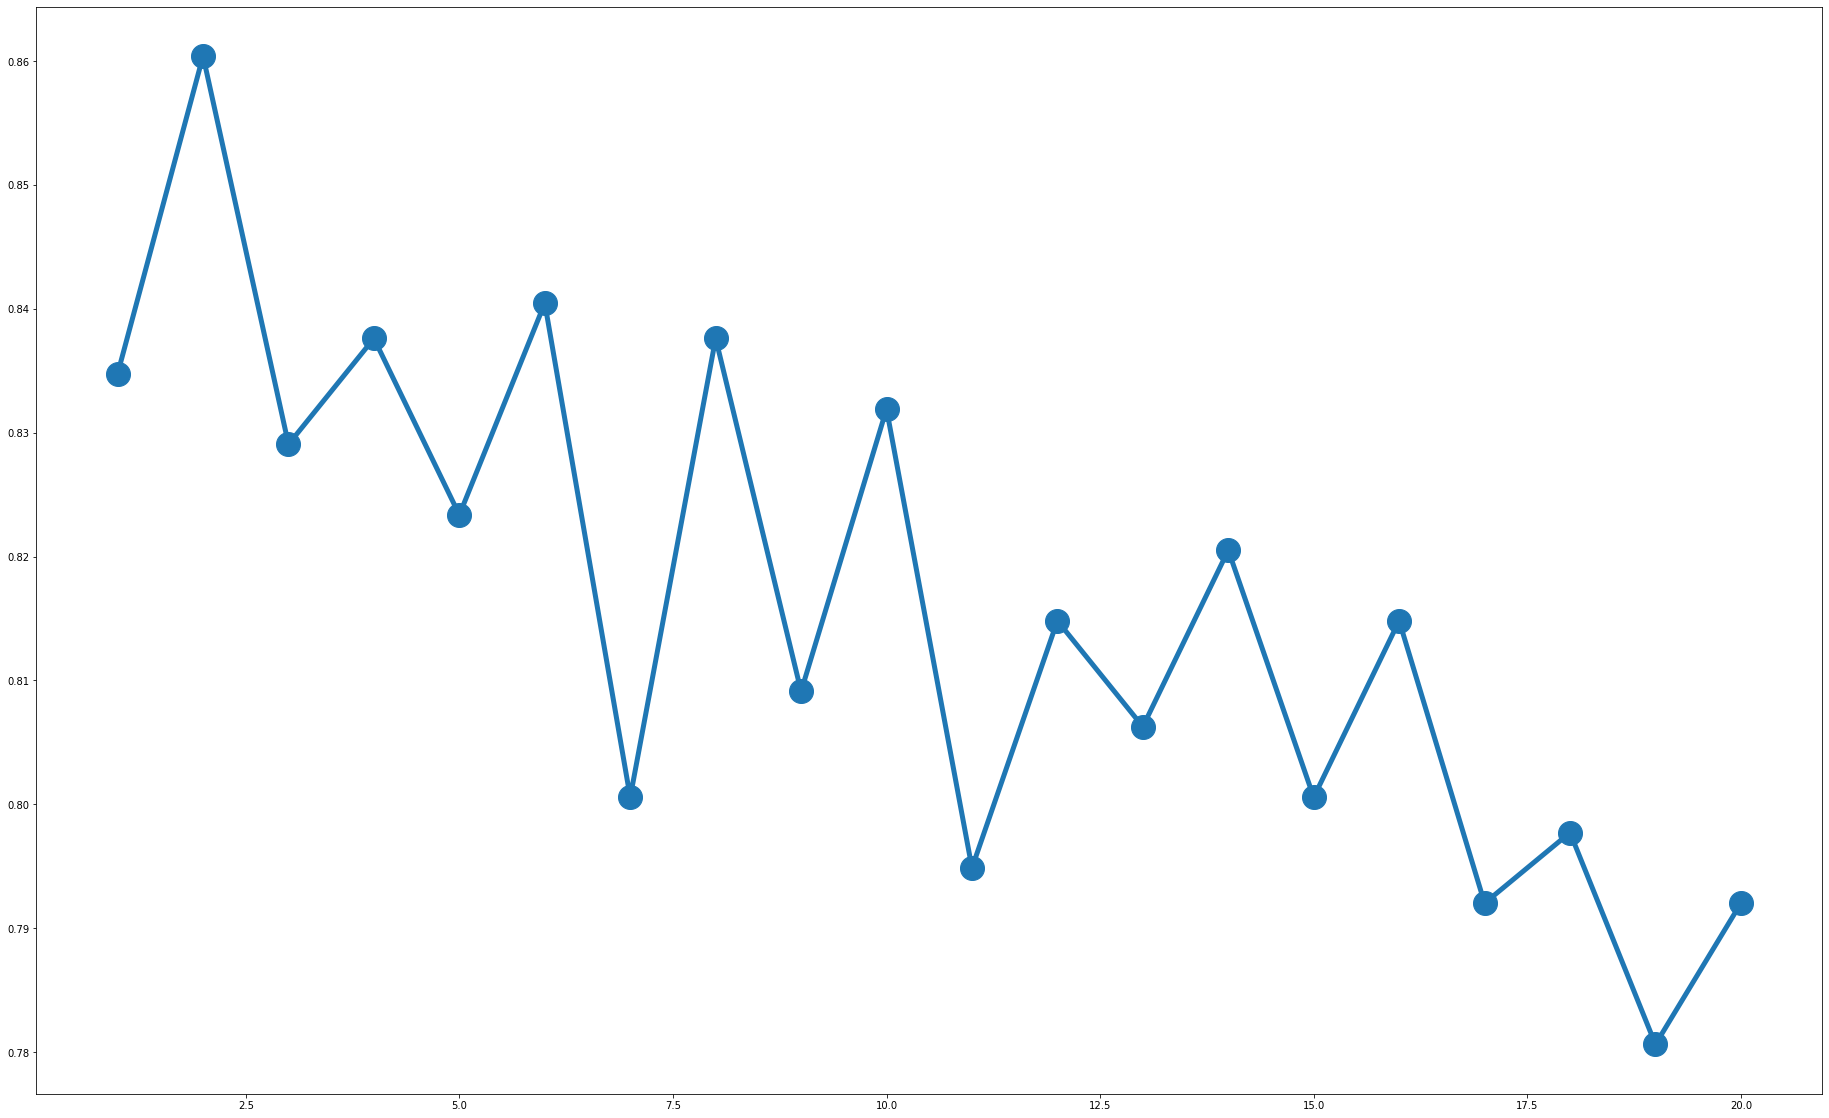

In [13]:
#plots parameter values with average scores, decreasing trend as number of neighbors increases 
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

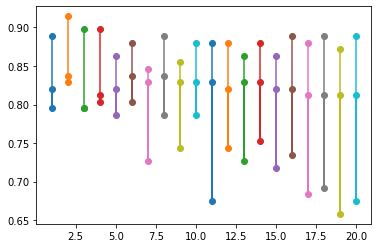

In [14]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

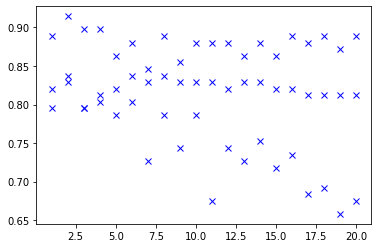

In [15]:
plt.plot(parameter_values, all_scores, 'bx')

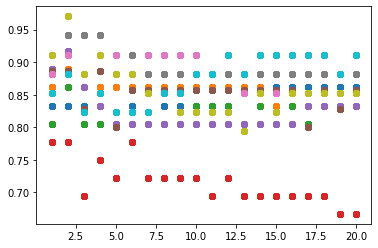

In [16]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

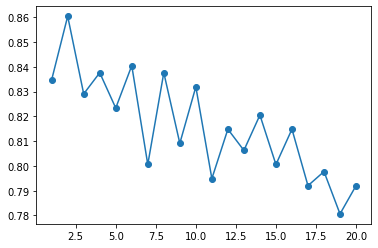

In [17]:
plt.plot(parameter_values, avg_scores, '-o')

In [18]:
#creates copy of array to avoid altering original dataset
X_broken = np.array(X)

In [19]:
#breaks dataset by dividing each feature by 10 
X_broken[:,::2] /= 10

In [20]:
#computes accuracy to account for scale change 
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,
  scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,
  scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))


C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The original average accuracy for is 82.3%
The 'broken' average accuracy for is 71.5%


In [21]:
#Applies Pre-processing to choose more effective features, feature based normalization, takes each feature and scales from 0 (smallest) to 1 (largest) in a linear map 
from sklearn.preprocessing import MinMaxScaler

In [22]:
#trains and applies the preprocessor by using fit_transform function, has the same shape as X but min of 0 and max of 1 
X_transformed = MinMaxScaler().fit_transform(X)

In [23]:
#creates a workflow using broken dataset , and recover the accuracy from before, features of the same scale are computed and account for it properly
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, 
  scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The average accuracy for is 82.3%


C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
#imports pipeline object, used to store steps inside the workflow , takes in raw data, performs transformations and create prediction,
from sklearn.pipeline import Pipeline

In [25]:
#uses MinMaxScaler to scale feature values from 0 to 1
#uses KNeighbors Classifier as classification algorithm
#represents each step as a tumple ('name', 'step') then creates pipeline (first uses name, then the secon is Transformer/estimator object)
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

In [26]:
#runs pipeline using the improved interface
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.3%


C:\Users\JRuiz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
